In [161]:
import numpy as np
import pandas as pd
import json
import glob
import os
import matplotlib.pyplot as plt

os.system('jupyter nbconvert --to html result_analysis.ipynb')

# conduct error analysis
data = []
path = 'exp/exp1_en/init_all_iter_confidence/P103.jsonl'
for line in open(path, "r", encoding="utf-8").readlines():
    dic = json.loads(line)
    keys = [ 'prompt', 'sub_label', 'obj_label', 'pred']
    res = [dic[i] for i in keys[:-1] ]
    res.append(''.join(dic['pred'][dic['num_mask']-1]))
    obj_label = res[-2]
    pred = res[-1]

    if obj_label != pred:
        data.append(res)

#     if obj_label in pred and obj_label != pred:
#         data.append(res)
# data

nl


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is een wettelijke term in [Y] .,president van de Verenigde Staten,Verenigde Staten van Amerika,deVerenigd##eStaten,deVerenigdeStaten,None
1,[X] is een wettelijke term in [Y] .,Amerikaans Congres,Verenigde Staten van Amerika,deVS,AmerikaansCon##gres,None
2,[X] is een wettelijke term in [Y] .,Senaat van de Verenigde Staten,Verenigde Staten van Amerika,deVerenigd##eStaten,deVerenigdeStaten,None
3,[X] is een wettelijke term in [Y] .,Lok Sabha,India,Turkije,LokSabha,None
4,[X] is een wettelijke term in [Y] .,limited liability company,Verenigde Staten van Amerika,Canada,deVS,None
5,[X] is een wettelijke term in [Y] .,Minister-president van Canada,Canada,Canada,Canada,same
6,[X] is een wettelijke term in [Y] .,Gouverneur-generaal van Canada,Canada,Canada,Canada,same
7,[X] is een wettelijke term in [Y] .,Parlement van Canada,Canada,Canada,Canada,same
8,[X] is een wettelijke term in [Y] .,Grondwet van de Verenigde Staten,Verenigde Staten van Amerika,deVerenigd##eStaten,deVerenigdeStaten,None
9,[X] is een wettelijke term in [Y] .,Wetgevende Raad van Hong Kong,Hongkong,HongKong,HongKong,None


el


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,κυβέρνηση,None
1,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κογκρέσο των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,Ελλάδα,None
2,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία των ΗΠΑ,Ηνωμένες Πολιτείες Αμερικής,.,Γ##ερ##ουσίατωνΗΠΑ,None
3,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εθνοσυνέλευση του Κεμπέκ,Κεμπέκ,κε.,νησί,None
4,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Λοκ Σάμπα,Ινδία,.,Ελλάδα,None
5,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εταιρεία Περιορισμένης Ευθύνης,Ηνωμένες Πολιτείες Αμερικής,ελλαδα,Ε##ται##ρεία,None
6,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Νομοθετική Συνέλευση της Βρετανικής Κολομβίας,Βρετανική Κολομβία,..,Κ##ο##λο##μ##βία,None
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None


zh


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X]的管辖范围是[Y]。,美国总统,美国,：,州,None
1,[X]的管辖范围是[Y]。,美国国会,美国,：,美国国会,None
2,[X]的管辖范围是[Y]。,美国参议院,美国,州,州,None
3,[X]的管辖范围是[Y]。,美国联邦法官,美国,州,州,None
4,[X]的管辖范围是[Y]。,魁北克省議會,魁北克,魁北克,魁北克省,lsm
5,[X]的管辖范围是[Y]。,人民院,印度,：,：,None
6,[X]的管辖范围是[Y]。,有限公司,美国,香港,：,None
7,[X]的管辖范围是[Y]。,不列顛哥倫比亞省省議會,不列颠哥伦比亚,：,：,None
8,[X]的管辖范围是[Y]。,昆士蘭州立法會,昆士蘭州,昆士蘭州,昆士蘭州,same
9,[X]的管辖范围是[Y]。,加拿大總理,加拿大,：,加拿大,mlm


en


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is a legal term in [Y] .,President of the United States,United States of America,Englishlaw,theUnitedStates,None
1,[X] is a legal term in [Y] .,United States Congress,United States of America,theAmericanConstitution,UnitedStatesCongress,None
2,[X] is a legal term in [Y] .,United States Senate,United States of America,theAmericanSenate,UnitedStatesSenate,None
3,[X] is a legal term in [Y] .,United States federal judge,United States of America,Canada,theUnitedStates,None
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,"Quebec,Canada",Quebec,mlm
5,[X] is a legal term in [Y] .,Lok Sabha,India,India,LokSabha,lsm
6,[X] is a legal term in [Y] .,limited liability company,United States of America,Englishlaw,limitedli##abilitycompany,None
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,Canada,BritishColumbia,None
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,Australia,Queensland,mlm
9,[X] is a legal term in [Y] .,Prime Minister of Canada,Canada,Canada,Canada,same


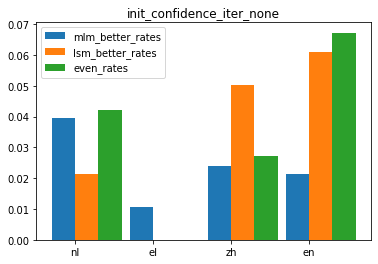

nl


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is een wettelijke term in [Y] .,president van de Verenigde Staten,Verenigde Staten van Amerika,deVerenigd##eStaten,deVerenigdeStaten,None
1,[X] is een wettelijke term in [Y] .,Amerikaans Congres,Verenigde Staten van Amerika,deVS,AmerikaansCon##gres,None
2,[X] is een wettelijke term in [Y] .,Senaat van de Verenigde Staten,Verenigde Staten van Amerika,deVerenigd##eStaten,deVerenigdeStaten,None
3,[X] is een wettelijke term in [Y] .,Lok Sabha,India,Turkije,LokSabha,None
4,[X] is een wettelijke term in [Y] .,limited liability company,Verenigde Staten van Amerika,Canada,deVS,None
5,[X] is een wettelijke term in [Y] .,Minister-president van Canada,Canada,Canada,Canada,same
6,[X] is een wettelijke term in [Y] .,Gouverneur-generaal van Canada,Canada,Canada,Canada,same
7,[X] is een wettelijke term in [Y] .,Parlement van Canada,Canada,Canada,Canada,same
8,[X] is een wettelijke term in [Y] .,Grondwet van de Verenigde Staten,Verenigde Staten van Amerika,deVerenigd##eStaten,deVerenigdeStaten,None
9,[X] is een wettelijke term in [Y] .,Wetgevende Raad van Hong Kong,Hongkong,HongKong,HongKong,None


el


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,κυβέρνηση,None
1,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κογκρέσο των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,Ελλάδα,None
2,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία των ΗΠΑ,Ηνωμένες Πολιτείες Αμερικής,.,Γ##ερ##ουσίατωνΗΠΑ,None
3,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εθνοσυνέλευση του Κεμπέκ,Κεμπέκ,..,νησί,None
4,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Λοκ Σάμπα,Ινδία,.,Ελλάδα,None
5,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εταιρεία Περιορισμένης Ευθύνης,Ηνωμένες Πολιτείες Αμερικής,ελλαδα,Ε##ται##ρεία,None
6,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Νομοθετική Συνέλευση της Βρετανικής Κολομβίας,Βρετανική Κολομβία,..,Κ##ο##λο##μ##βία,None
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,...,Κ##αν##α##δ##ά,None
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,..,Κ##αν##α##δ##ά,None


zh


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X]的管辖范围是[Y]。,美国总统,美国,：,州,None
1,[X]的管辖范围是[Y]。,美国国会,美国,：,美国国会,None
2,[X]的管辖范围是[Y]。,美国参议院,美国,州,州,None
3,[X]的管辖范围是[Y]。,美国联邦法官,美国,州,州,None
4,[X]的管辖范围是[Y]。,魁北克省議會,魁北克,魁北克,魁北克省,lsm
5,[X]的管辖范围是[Y]。,人民院,印度,：,：,None
6,[X]的管辖范围是[Y]。,有限公司,美国,香港,：,None
7,[X]的管辖范围是[Y]。,不列顛哥倫比亞省省議會,不列颠哥伦比亚,：,：,None
8,[X]的管辖范围是[Y]。,昆士蘭州立法會,昆士蘭州,昆士蘭州,昆士蘭州,same
9,[X]的管辖范围是[Y]。,加拿大總理,加拿大,：,加拿大,mlm


en


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is a legal term in [Y] .,President of the United States,United States of America,AmericanEnglish,theUnitedStates,None
1,[X] is a legal term in [Y] .,United States Congress,United States of America,theAmericanConstitution,UnitedStatesCongress,None
2,[X] is a legal term in [Y] .,United States Senate,United States of America,theAmericanSenate,theUnitedStatesSenate,None
3,[X] is a legal term in [Y] .,United States federal judge,United States of America,Canada,theUnitedStates,None
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,"Quebec,Canada",Quebec,mlm
5,[X] is a legal term in [Y] .,Lok Sabha,India,India,LokSabha,lsm
6,[X] is a legal term in [Y] .,limited liability company,United States of America,Englishlaw,limitedli##abilitycompany,None
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,Canada,BritishColumbia,None
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,Australia,Queensland,mlm
9,[X] is a legal term in [Y] .,Prime Minister of Canada,Canada,Canada,Canada,same


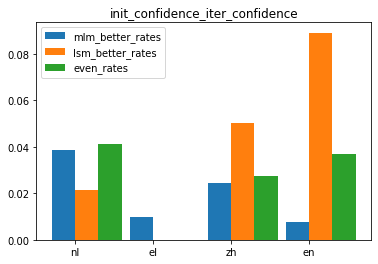

nl


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is een wettelijke term in [Y] .,president van de Verenigde Staten,Verenigde Staten van Amerika,Nederland,deVerenigdeStaten,None
1,[X] is een wettelijke term in [Y] .,Amerikaans Congres,Verenigde Staten van Amerika,Amerika,Amerika,None
2,[X] is een wettelijke term in [Y] .,Senaat van de Verenigde Staten,Verenigde Staten van Amerika,Nederland,deVerenigdeStaten,None
3,[X] is een wettelijke term in [Y] .,Lok Sabha,India,Turkije,India,mlm
4,[X] is een wettelijke term in [Y] .,limited liability company,Verenigde Staten van Amerika,Canada,België,None
5,[X] is een wettelijke term in [Y] .,Minister-president van Canada,Canada,Canada,Canada,same
6,[X] is een wettelijke term in [Y] .,Gouverneur-generaal van Canada,Canada,Canada,Canada,same
7,[X] is een wettelijke term in [Y] .,Parlement van Canada,Canada,Canada,Canada,same
8,[X] is een wettelijke term in [Y] .,Grondwet van de Verenigde Staten,Verenigde Staten van Amerika,Amerika,deVerenigdeStaten,None
9,[X] is een wettelijke term in [Y] .,Wetgevende Raad van Hong Kong,Hongkong,Hongkong,HongKong,lsm


el


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,κυβέρνηση,None
1,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κογκρέσο των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,Ελλάδα,None
2,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία των ΗΠΑ,Ηνωμένες Πολιτείες Αμερικής,.,ΗΠΑ,None
3,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εθνοσυνέλευση του Κεμπέκ,Κεμπέκ,.,νησί,None
4,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Λοκ Σάμπα,Ινδία,.,Ελλάδα,None
5,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εταιρεία Περιορισμένης Ευθύνης,Ηνωμένες Πολιτείες Αμερικής,ελλαδα,Ελλάδα,None
6,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Νομοθετική Συνέλευση της Βρετανικής Κολομβίας,Βρετανική Κολομβία,αγγλικη,Κ##ο##λο##μ##βία,None
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None


zh


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X]的管辖范围是[Y]。,美国总统,美国,：,州,None
1,[X]的管辖范围是[Y]。,美国国会,美国,：,州,None
2,[X]的管辖范围是[Y]。,美国参议院,美国,州,州,None
3,[X]的管辖范围是[Y]。,美国联邦法官,美国,州,州,None
4,[X]的管辖范围是[Y]。,魁北克省議會,魁北克,：,省,None
5,[X]的管辖范围是[Y]。,人民院,印度,：,：,None
6,[X]的管辖范围是[Y]。,有限公司,美国,：,：,None
7,[X]的管辖范围是[Y]。,不列顛哥倫比亞省省議會,不列颠哥伦比亚,：,：,None
8,[X]的管辖范围是[Y]。,昆士蘭州立法會,昆士蘭州,：,：,None
9,[X]的管辖范围是[Y]。,加拿大總理,加拿大,：,省,None


en


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is a legal term in [Y] .,President of the United States,United States of America,English,theUnitedStates,None
1,[X] is a legal term in [Y] .,United States Congress,United States of America,Canada,UnitedUnitedCongress,None
2,[X] is a legal term in [Y] .,United States Senate,United States of America,AmericanAmericanhistory,UnitedUnitedSenate,None
3,[X] is a legal term in [Y] .,United States federal judge,United States of America,Canada,court,None
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,QuebecCanada,Quebec,mlm
5,[X] is a legal term in [Y] .,Lok Sabha,India,India,India,same
6,[X] is a legal term in [Y] .,limited liability company,United States of America,Australia,English,None
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,Canada,BritishColumbia,None
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,Australia,Queensland,mlm
9,[X] is a legal term in [Y] .,Prime Minister of Canada,Canada,Canada,Canada,same


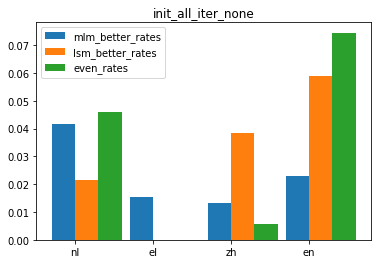

nl


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is een wettelijke term in [Y] .,president van de Verenigde Staten,Verenigde Staten van Amerika,Nederland,deVerenigdeStaten,None
1,[X] is een wettelijke term in [Y] .,Amerikaans Congres,Verenigde Staten van Amerika,Amerika,AmerikaansCon##gres,None
2,[X] is een wettelijke term in [Y] .,Senaat van de Verenigde Staten,Verenigde Staten van Amerika,Nederland,deVerenigdeStaten,None
3,[X] is een wettelijke term in [Y] .,Lok Sabha,India,Turkije,India,mlm
4,[X] is een wettelijke term in [Y] .,limited liability company,Verenigde Staten van Amerika,Canada,België,None
5,[X] is een wettelijke term in [Y] .,Minister-president van Canada,Canada,Canada,Canada,same
6,[X] is een wettelijke term in [Y] .,Gouverneur-generaal van Canada,Canada,Canada,Canada,same
7,[X] is een wettelijke term in [Y] .,Parlement van Canada,Canada,Canada,Canada,same
8,[X] is een wettelijke term in [Y] .,Grondwet van de Verenigde Staten,Verenigde Staten van Amerika,Amerika,deVerenigdeStaten,None
9,[X] is een wettelijke term in [Y] .,Wetgevende Raad van Hong Kong,Hongkong,HongKong,HongKong,None


el


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρόεδρος των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,κυβέρνηση,None
1,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κογκρέσο των Ηνωμένων Πολιτειών,Ηνωμένες Πολιτείες Αμερικής,.,Ελλάδα,None
2,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γερουσία των ΗΠΑ,Ηνωμένες Πολιτείες Αμερικής,....,ΗΠΑ,None
3,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εθνοσυνέλευση του Κεμπέκ,Κεμπέκ,..,νησί,None
4,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Λοκ Σάμπα,Ινδία,.,Ελλάδα,None
5,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Εταιρεία Περιορισμένης Ευθύνης,Ηνωμένες Πολιτείες Αμερικής,ελλαδα,Ελλάδα,None
6,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Νομοθετική Συνέλευση της Βρετανικής Κολομβίας,Βρετανική Κολομβία,....,Κ##ο##λο##μ##βία,None
7,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Πρωθυπουργός του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None
8,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Γενικός Κυβερνήτης του Καναδά,Καναδάς,κοσμο,Κ##αν##α##δ##ά,None
9,[DEF;X] [X.Nom] είναι ένας νομικός όρος [PREPD...,Κοινοβούλιο του Καναδά,Καναδάς,τομεατουισλαμ.,Κ##αν##α##δ##ά,None


zh


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X]的管辖范围是[Y]。,美国总统,美国,：,州,None
1,[X]的管辖范围是[Y]。,美国国会,美国,：,州,None
2,[X]的管辖范围是[Y]。,美国参议院,美国,州,州,None
3,[X]的管辖范围是[Y]。,美国联邦法官,美国,州,州,None
4,[X]的管辖范围是[Y]。,魁北克省議會,魁北克,：,省,None
5,[X]的管辖范围是[Y]。,人民院,印度,：,：,None
6,[X]的管辖范围是[Y]。,有限公司,美国,：,：,None
7,[X]的管辖范围是[Y]。,不列顛哥倫比亞省省議會,不列颠哥伦比亚,：,：,None
8,[X]的管辖范围是[Y]。,昆士蘭州立法會,昆士蘭州,：,：,None
9,[X]的管辖范围是[Y]。,加拿大總理,加拿大,：,省,None


en


,prompt,sub_label,obj_label,pred_lsm,pred_mlm,better
0,[X] is a legal term in [Y] .,President of the United States,United States of America,AmericanEnglish,theUnitedStates,None
1,[X] is a legal term in [Y] .,United States Congress,United States of America,Americanlaw,UnitedStatesCongress,None
2,[X] is a legal term in [Y] .,United States Senate,United States of America,AmericanAmericanpolitics,UnitedStates,None
3,[X] is a legal term in [Y] .,United States federal judge,United States of America,Canada,court,None
4,[X] is a legal term in [Y] .,National Assembly of Quebec,Quebec,Quebeclaw,Quebec,mlm
5,[X] is a legal term in [Y] .,Lok Sabha,India,India,India,same
6,[X] is a legal term in [Y] .,limited liability company,United States of America,Englishlaw,theUK,None
7,[X] is a legal term in [Y] .,Legislative Assembly of British Columbia,British Columbia,Canada,BritishColumbia,None
8,[X] is a legal term in [Y] .,Legislative Assembly of Queensland,Queensland,Australia,Queensland,mlm
9,[X] is a legal term in [Y] .,Prime Minister of Canada,Canada,Canada,Canada,same


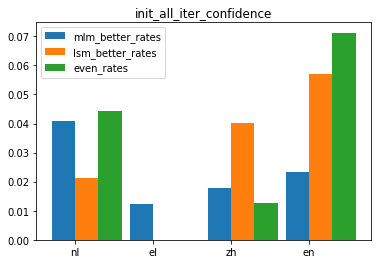

In [162]:

langs = [
    'nl', 
         'el', 
         'zh',
        'en'
        ]

def read_results(folder_name, filename, task = '*'):
    path = folder_name + filename
    data = []
    
    for jsname in glob.glob(path +'/%s.jsonl'%task):
        
        for line in open(jsname, encoding="utf8").readlines():
            
            dic = json.loads(line)
            keys = [ 'prompt', 'sub_label', 'obj_label', 'pred']
            res = [dic[i] for i in keys[:-1] ]
            res.append(''.join(dic['pred'][dic['num_mask']-1]))
            obj_label = res[-2]
            pred = res[-1]
            data.append(res)
                        
    return pd.DataFrame(data, columns = ['prompt', 'sub_label', 'obj_label', 'pred'])

def comp(obj,x,y):
    if obj ==x !=y:
        return 'lsm'
    if obj ==y !=x:
        return 'mlm'
    if obj ==y ==x:
        return 'same'
    return None

def show_diff(s_res, m_res, lang):
    print(lang)
    mbetter = []
    sbetter = []
    outer = pd.merge(s_res, m_res, how = 'outer',suffixes=('_lsm', '_mlm'), on=['prompt', 'sub_label', 'obj_label'])
    df = pd.merge(s_res, m_res, how = 'inner',suffixes=('_lsm', '_mlm'), on=['prompt', 'sub_label', 'obj_label'])

    df['better'] = np.vectorize(comp)(df['obj_label'], df['pred_lsm'],df['pred_mlm'] )
    display(df.head(10))
    sbr = len(df[df['better']=='lsm'])/len(df)
    mbr = len(df[df['better']=='mlm'])/len(df)
    samer = len(df[df['better']=='same'])/len(df)

    return mbr, sbr, samer


filenames = ['/init_confidence_iter_none/', '/init_confidence_iter_confidence/', 
             '/init_all_iter_none/', '/init_all_iter_confidence/']
for filename in filenames:
    
    mb_rates = []
    sb_rates = []
    same_rates = []
    
    for lang in langs:
        folder_name = 'exp/exp1_' + lang

        s_res = read_results(folder_name, filename)
        m_res = read_results(folder_name + '_m', filename)
        
        mbr, sbr, samer = show_diff(s_res, m_res, lang)
        mb_rates.append(mbr)
        sb_rates.append(sbr)
        same_rates.append(samer)

    # Width of a bar 
    width = 0.3       
    ind = np.arange(4)
    
    # Plotting
    plt.title(filename[1:-1])
    plt.bar(ind, mb_rates, width, label='mlm_better_rates')
    plt.bar(ind + width, sb_rates, width, label='lsm_better_rates')
    plt.bar(ind +2* width, same_rates, width, label='even_rates')

    plt.xticks(ind + width / 2, langs)
    
    plt.legend(loc='best')
    plt.savefig(filename[1:-1])
    plt.show()


In [163]:
# calculate single/multi token accuracies
def counting(json_list):
    multi_correct = 0
    multi_n = 0
    single_correct = 0
    single_n = 0
    j = 0
    for json_str in json_list:
        result = json.loads(json_str)
        obj = result['tokenized_obj_label_inflection']
        pred_ind = result['num_mask'] - 1
        pred = result['pred'][pred_ind]
        correct = int(pred == obj)
        if len(obj) > 1:
            multi_n += 1
            multi_correct += correct
        else:
            single_n += 1
            single_correct += correct
    return multi_correct, multi_n, single_correct, single_n

def cal_acc(folder_name):
    path = folder_name + '/'
    mc, mn, sc, sn = 0, 0, 0, 0
    for f_name in os.listdir(path):
        if not f_name.endswith('jsonl'):
            continue
        with open(path + f_name, 'r') as json_file:
            json_list = list(json_file)
            a, b, c, d = counting(json_list)
            mc += a
            mn += b
            sc += c
            sn += d
    return mc/mn, sc/sn

In [164]:
# extract accuracy results from .out files
def extract_result(path):
    data = []
    _, exp_group, name = path.split('\\')
    folder_name = path[:-4]

    data.append(exp_group[5:])
    name = name[:-4]
    components = name.split('_')
    if len(components)>4:
        return None
    data+= [components[i] for i in [1,3]]
    
    for line in open(path, "r", encoding="utf8").readlines()[-1:]:
        res = [line.split()[i] for i in [3, 7]]
        data.append(float(res[0][-6:])*100)
        data.append(float(res[1][:6])*100)
#         multi_acc, single_acc = cal_acc(folder_name)
#         data+=[single_acc*100, multi_acc*100]

    return data

files = glob.glob('exp/**/*.out')
res = []
for file in files:
    res.append(extract_result(file))
    
df = pd.DataFrame([i for i in res if i is not None], columns = ['lang', 'init','refine', 'acc per fact', 'acc per relation', 
#                                                                 'single', 'multi'
                                                               ])
df = df.drop(['acc per relation'], axis=1)
# display(df.head())
lang_vals = df['lang'].unique()
df = df.groupby(by=[ "init", 'refine', 'lang']).mean().round(2).reset_index()
df = df.astype('str')
dfs = [df[df['lang'] ==i].reset_index(drop = True).drop('lang', axis=1) for i in df['lang'].unique()]
df = dfs[0]
for df_ in dfs[1:]:
    df = df.merge(df_, on=['init','refine'])
df = df.set_axis(['init','refine'] + ['acc per fact_' + val for val in lang_vals], axis=1, inplace=False)

df
# df = pd.merge(df[df['lang'] =='en'].reset_index(drop = True).drop('lang', axis=1), df[df['lang'] =='zh'].reset_index(drop = True).drop('lang', axis=1), on=['init','refine'])


,init,refine,acc per fact_el,acc per fact_el_m,acc per fact_en,acc per fact_en_m,acc per fact_nl,acc per fact_nl_m,acc per fact_zh,acc per fact_zh_m
0,all,confidence,2.31,2.76,12.88,10.74,6.74,9.58,5.29,3.16
1,all,none,2.65,2.64,13.17,10.88,6.78,9.77,4.41,2.01
2,confidence,confidence,2.44,3.84,12.74,6.47,6.82,9.68,7.76,5.19
3,confidence,none,2.68,3.93,12.92,10.92,6.85,9.83,7.76,5.16


In [165]:
# generate latex source text
def print_table(df):
    prev_t=1
    now_t=2
    prev_f=1
    now_f=2
    j='&'

    for row in df:
        lists = list(row)
        now_t = lists[0]
        now_f = lists[1]    
        if prev_t!= now_t:
            print('\hline')
        else:
            lists[0] = '~'
            if prev_f == now_f:
                lists[1] = '~'
                print('\cline{4-6}')
        prev_t = now_t
        prev_f = now_f
        new_line = j.join(lists)
        print(new_line+'\\\\')
    print('\hline')

print_table(df)

\hline
i&n&i&t\\
\hline
r&e&f&i&n&e\\
\hline
a&c&c& &p&e&r& &f&a&c&t&_&e&l\\
\cline{4-6}
~&~&c& &p&e&r& &f&a&c&t&_&e&l&_&m\\
\cline{4-6}
~&~&c& &p&e&r& &f&a&c&t&_&e&n\\
\cline{4-6}
~&~&c& &p&e&r& &f&a&c&t&_&e&n&_&m\\
\cline{4-6}
~&~&c& &p&e&r& &f&a&c&t&_&n&l\\
\cline{4-6}
~&~&c& &p&e&r& &f&a&c&t&_&n&l&_&m\\
\cline{4-6}
~&~&c& &p&e&r& &f&a&c&t&_&z&h\\
\cline{4-6}
~&~&c& &p&e&r& &f&a&c&t&_&z&h&_&m\\
\hline
